# RNetwork Visualization - Maze

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import numpy as np

from tqdm import tqdm
from omegaconf import OmegaConf

import envs
import utils

from rnet.model import RNetModel
from rnet.memory import RNetMemory
from rnet.utils import load

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Config Utils

In [15]:
cfg_path = f"../conf/config.yaml"

env_name = 'maze_U4rooms'

cfg = OmegaConf.load(cfg_path)
env_cfg = OmegaConf.load(f'../conf/env/{env_name}.yaml')
cfg = OmegaConf.merge(cfg, env_cfg)


space_info = utils.get_space_info(cfg.env.obs, cfg.env.action_dim)
device = torch.device("cuda:0")

In [4]:
env = envs.make_env(cfg.env, space_info)

points = env.generate_points(30, random=False)

## Load

In [5]:
model = RNetModel(cfg.rnet.model, space_info)

In [6]:
memory = RNetMemory(cfg.rnet.memory, space_info, model.feat_size, device)

In [7]:
exp_name = 'maze_U4rooms-rsp'
save_dir = os.path.join('/checkpoint/linamezghani/offline-gcrl/rnet/', exp_name)

memory, NN, model = load(save_dir, memory, model)

Loading rnet objects from  /checkpoint/linamezghani/offline-gcrl/rnet/maze_U4rooms-rsp


## Visualize

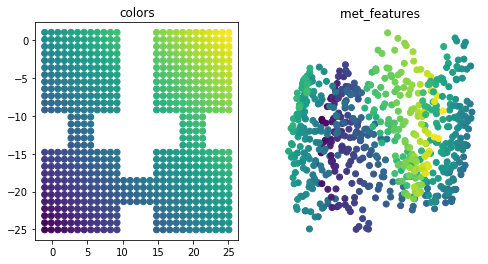

In [8]:
model.eval()
model.to("cpu")
fig = env.plot_embeddings(model, points['state'][:, :], points['state'][:, :],
                          show_colors=True)

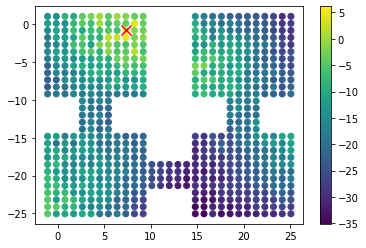

In [9]:
i = np.random.randint(0, points['state'][:, :3].shape[0])
fig = env.plot_values(model, points['state'][:, :3][i], points['state'][:, :3][i], points['state'][:, :3],
                      points['state'][:, :3])

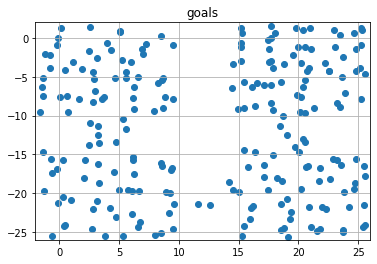

In [10]:
env.set_goals(memory.get_goals())
fig = env.plot_goals()

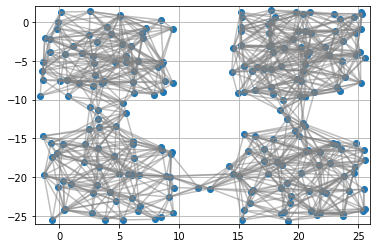

In [11]:
fig = env.plot_graph(memory)

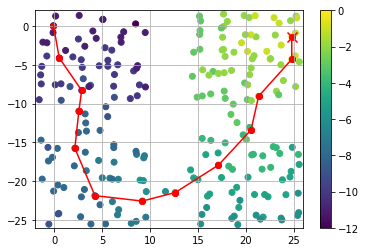

In [14]:
fig = env.plot_graph_dist(memory)